In [35]:
import numpy as np
import pandas as pd
data={"val":[-20,1,3,2,4,8,5,6,7,9,1,5,1,25]}
data=pd.DataFrame(data)
#data
print("mean:",data['val'].mean())
print("median:",data['val'].median())
print("mode:",data['val'].mode())
print("percentile",data['val'].quantile(0.25))
print("percentile",np.percentile(data['val'],25))

mean: 4.071428571428571
median: 4.5
mode: 0    1
Name: val, dtype: int64
percentile 1.25
percentile 1.25


In [50]:
#meaure of location of the datq
q1=np.percentile(data['val'],25)
q3=np.percentile(data['val'],75)
iqr=q3-q1
upperbound=q3+1.5*iqr
lowerbound=q1-1.5*iqr
outliers=data[(data['val']<lowerbound) | (data['val']>upperbound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("upperbound:",upperbound)
print("lowerbound:",lowerbound)
print("outliers:",outliers)

Q1: 1.25
Q3: 6.75
IQR: 5.5
upperbound: 15.0
lowerbound: -7.0
outliers:     val
0   -20
13   25


In [70]:
#feq
freq_table=data["val"].value_counts().reset_index()
freq_table.columns=['uni_val','feq']
freq_table['cum_feq']=freq_table['feq'].cumsum()
freq_table['rel_freq']=freq_table['feq']/freq_table['feq'].sum()
freq_table['cum_rel_freq']=freq_table['rel_freq'].cumsum()

freq_table

,uni_val,feq,cum_feq,rel_freq,cum_rel_freq
0,1,3,3,0.214286,0.214286
1,5,2,5,0.142857,0.357143
2,-20,1,6,0.071429,0.428571
3,3,1,7,0.071429,0.500000
4,2,1,8,0.071429,0.571429
5,4,1,9,0.071429,0.642857
6,8,1,10,0.071429,0.714286
7,6,1,11,0.071429,0.785714
8,7,1,12,0.071429,0.857143
9,9,1,13,0.071429,0.928571


In [71]:
kewness → “Which side is the data leaning?”
Skewness

Definition: Measures asymmetry of a data distribution around its mean.

Interpretation:

Skewness = 0 → perfectly symmetric (like normal distribution)

Skewness > 0 → right-skewed (long tail on the right)

Skewness < 0 → left-skewed (long tail on the left)


np.float64(-0.534139625640503)

In [76]:
print("kew :",data['val'].skew())

kew : -0.534139625640503


In [72]:
Kurtosis → “How heavy or light are the tails / outliers?”
Definition: Measures the tailedness / peak of a distribution.

Interpretation:

Kurtosis ≈ 3 (mesokurtic) → normal distribution

Kurtosis > 3 (leptokurtic) → heavy tails, higher chance of outliers

Kurtosis < 3 (platykurtic) → light tails, flatter distribution
    


np.float64(5.11703214023562)

In [78]:
print("kurtosis:",data['val'].kurtosis())

kurtosis: 5.11703214023562


In [79]:
print("Variance:",data['val'].var())

outliers: 84.99450549450549


In [80]:
print("Standard Diviation:",data['val'].std())

Standard Diviation: 9.219246471079156


Normal Distbution:


C:\Users\15016\AppData\Local\Temp\ipykernel_35804\1844820425.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['val'])


<Axes: xlabel='val', ylabel='Density'>

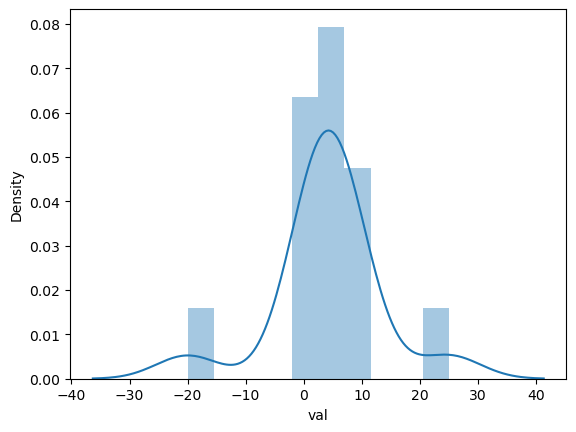

In [81]:
print("Normal Distbution:")
import seaborn as sns
sns.distplot(data['val'])

C:\Users\15016\AppData\Local\Temp\ipykernel_35804\3340075074.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["z_score"], kde=True)


<Axes: xlabel='z_score', ylabel='Density'>

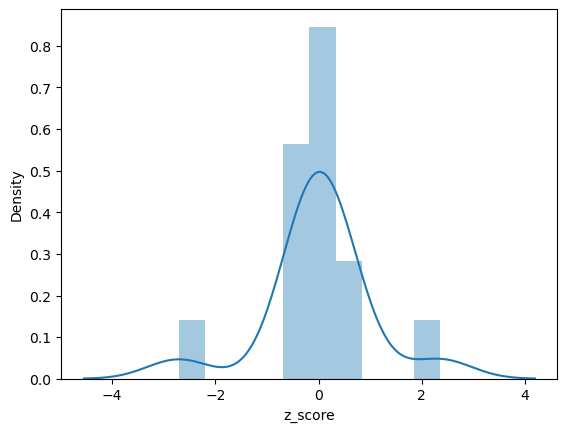

In [84]:
# Calculate Z-score
from scipy.stats import zscore
data["z_score"] = zscore(data['val'])
data
import seaborn as sns
sns.distplot(data["z_score"], kde=True)